Данный ноутбк содержит вспомогательный материал для лекции №5 "Отбор признаков и визуализация". На примере выборки "Titanic" (https://www.kaggle.com/c/titanic) с использованием библиотек sklearn (http://scikit-learn.org) и pandas (https://pandas.pydata.org/) демонстрируется процесс анализа существующих признаков, генерация новых признаков, визуализация выборки.

Приведенный код носит демонстрационный характер и не претендует на получение высоких результатов в рассмотренной задач

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression

sns.set(style='white', context='notebook', palette='deep')

In [38]:
# Load data
##### Load train and Test set

train = pd.read_csv("task2_train.csv")
test = pd.read_csv("task2_test.csv")
y_test = pd.read_csv("task2_test_labels.csv")["Survived"]
IDtest = test["PassengerId"]

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
train = train.fillna(np.nan)

print(train.isnull().sum())
print(train.info())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [102]:
def evaluate_model(model, x_train, y_train, x_test, y_test):

    print("Accuracy on train", 
          np.mean(baseline_model.predict(x_train.as_matrix()) == y_train.as_matrix()))

    print("Accuracy on test",
          np.mean(baseline_model.predict(x_test.as_matrix()) == y_test.as_matrix()))


Обучим простую модель, использующую только числовые признаки. Эта модель будет выступать в роли примера простейшего решения задачи без какого-либо анализа данных.

In [164]:
baseline_features = ["Pclass", "Age", "SibSp", "Parch", "Fare"]

x_train = train[baseline_features].copy()
y_train = train["Survived"].copy()

x_train["Fare"] = x_train["Fare"].fillna(x_train["Fare"].median())
x_train["Age"] = x_train["Age"].fillna(x_train["Age"].median())

print(x_train.isnull().sum())

baseline_model = LogisticRegression()

baseline_model.fit(x_train.as_matrix(), y_train.as_matrix())

x_test = test[baseline_features].copy()
x_test["Fare"] = x_test["Fare"].fillna(x_train["Fare"].median())
x_test["Age"] = x_test["Age"].fillna(x_train["Age"].median())

evaluate_model(baseline_model, x_train, y_train, x_test, y_test)

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64
Accuracy on train 0.704826038159
Accuracy on test 0.667464114833


Добавим категориальные признаки.

In [165]:
x_train = x_train.join(pd.get_dummies(train["Embarked"]))
x_train = x_train.join(pd.get_dummies(train["Sex"]))
x_train = x_train.join(pd.get_dummies(train["Pclass"], prefix="Pclass"))
x_train = x_train.drop("Pclass", axis=1)
x_train['IsMinor']=np.where(x_train['Age']<=16, 1, 0)
# x_train['IsOld']=np.where(x_train['Age']>=60, 1, 0)
x_train['TravelAlone']=np.where((x_train["SibSp"]+x_train["Parch"])>0, 0, 1)

x_test = x_test.join(pd.get_dummies(test["Embarked"]))
x_test = x_test.join(pd.get_dummies(test["Sex"]))
x_test = x_test.join(pd.get_dummies(test["Pclass"], prefix="Pclass"))
x_test = x_test.drop("Pclass", axis=1)
x_test['IsMinor']=np.where(x_test['Age']<=16, 1, 0)
x_test['TravelAlone']=np.where((x_test["SibSp"]+x_test["Parch"])>0, 0, 1)
# x_test['IsOld']=np.where(x_test['Age']>=60, 1, 0)

print(x_train.columns)

baseline_model.fit(x_train.as_matrix(), y_train.as_matrix())

evaluate_model(baseline_model, x_train, y_train, x_test, y_test)

Index(['Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'female', 'male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'IsMinor', 'TravelAlone'],
      dtype='object')
Accuracy on train 0.810325476992
Accuracy on test 0.77990430622


In [166]:
# from sklearn.feature_selection import RFE

rfe = RFE(baseline_model, 8)
rfe = rfe.fit(x_train.as_matrix(), y_train.as_matrix())
# summarize the selection of the attributes
print('Selected features: %s' % list(x_train.columns[rfe.support_]))

evaluate_model(rfe, x_train, y_train, x_test, y_test)

Selected features: ['SibSp', 'Q', 'female', 'male', 'Pclass_1', 'Pclass_3', 'IsMinor', 'TravelAlone']
Accuracy on train 0.810325476992
Accuracy on test 0.77990430622


Optimal number of features: 13
Selected features: ['Age', 'SibSp', 'Parch', 'C', 'Q', 'S', 'female', 'male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'IsMinor', 'TravelAlone']


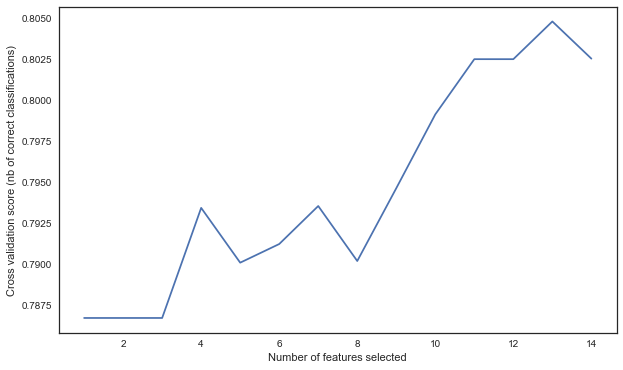

Accuracy on train 0.810325476992
Accuracy on test 0.77990430622


In [169]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='accuracy')
rfecv.fit(x_train.as_matrix(), y_train.as_matrix())

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(x_train.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

evaluate_model(rfecv, x_train, y_train, x_test, y_test)

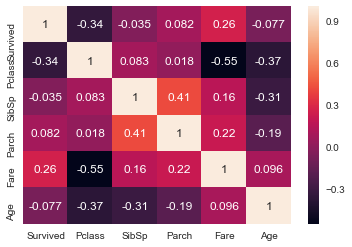

In [16]:
sns.heatmap(train[["Survived", "Pclass", "SibSp", "Parch", "Fare", "Age"]].corr(), annot=True)

In [157]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_embeded_pca = pca.fit_transform(x_train.as_matrix())

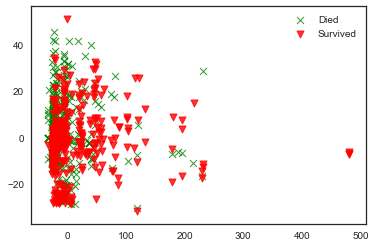

In [158]:
plt.figure()
plt.scatter(x_embeded_pca[np.where(y_train.as_matrix() == 0), 0],
            x_embeded_pca[np.where(y_train.as_matrix() == 0), 1],
            marker='x', color='g',
            linewidth='1', alpha=0.8, label='Died')
plt.scatter(x_embeded_pca[np.where(y_train.as_matrix() == 1), 0],
            x_embeded_pca[np.where(y_train.as_matrix() == 1), 1],
            marker='v', color='r',
            linewidth='1', alpha=0.8, label='Survived')
plt.legend()

In [160]:
from sklearn.manifold import TSNE

x_embeded_tsne = TSNE(n_components=2, perplexity=50).fit_transform(x_train.as_matrix())

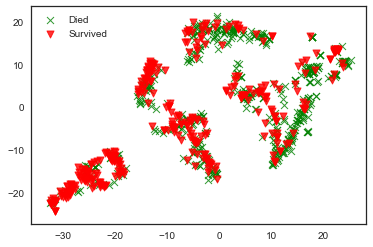

In [161]:
plt.figure()
plt.scatter(x_embeded_tsne[np.where(y_train.as_matrix() == 0), 0],
            x_embeded_tsne[np.where(y_train.as_matrix() == 0), 1],
            marker='x', color='g',
            linewidth='1', alpha=0.8, label='Died')
plt.scatter(x_embeded_tsne[np.where(y_train.as_matrix() == 1), 0],
            x_embeded_tsne[np.where(y_train.as_matrix() == 1), 1],
            marker='v', color='r',
            linewidth='1', alpha=0.8, label='Survived')
plt.legend()